# Chrome Dinosaur game reinforcement learning

## 1. Install dependencies

In [1]:
# for super fast screen capture
from mss import mss
# for fast button presses
import pydirectinput
import cv2 as cv
import numpy as np
# for ocr (optical character recognition)
import pytesseract
from matplotlib import pyplot as plt
import time
# base env class
from gym import Env
from gym.spaces import Box, Discrete

## 2. Build custom environment

### 2.1 Build env

In [2]:
class WebGame(Env):
    def __init__(self) -> None:
        super().__init__()
        
        # === Define spaces
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        # can be 0, 1 or 2
        # 0 = up, 1 = down, 2 = no op
        self.action_space = Discrete(3)

        # === Define extraction parameters
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 600, 'height': 500}
        self.done_location = {'top': 405, 'left': 630, 'width': 660, 'height': 70}
        
    def step(self, action):
        # take action
        action_map = {
            0: 'up',
            1: 'down',
            # 2 is no op
        }
        
        if action != 2:
            pydirectinput.press(action_map[action])
        
        # get infos
        done = self.get_done()
        obs = self.get_observation()
        
        # reward for every frame alive
        if done:
            reward = 0
        else:
            reward = 1
        
        info = {}
        
        return obs, reward, done, info
    
    def render(self):
        # omiting function
        pass
    
    def reset(self):
        time.sleep(2)
        
        # this is really to make sure we are tabbed into the game
        pydirectinput.click(150, 150)
        
        pydirectinput.press('space')
    
    # non standart functions
    def get_observation(self):
        # get screenshot
        obs = np.array(self.cap.grab(self.game_location))
        
        # channels are BGRA
        obs = obs[..., :3]
        
        obs = cv.cvtColor(obs, cv.COLOR_BGR2GRAY)
        
        obs = cv.resize(obs, (100, 83))
        obs = np.expand_dims(obs, -1)
        
        return obs
    
    def close(self) -> None:
        return super().close()
    
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))
        done_cap = done_cap[..., :3]
        
        # search for these strings
        done_strings = ['GAME', 'GAHE']
        
        done = False
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        
        return done

In [3]:
env = WebGame()

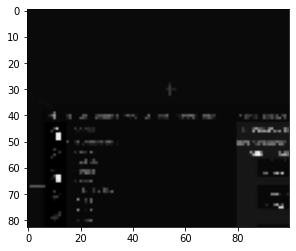

In [6]:
obs = env.get_observation()
plt.imshow(obs, cmap='gray')

In [19]:
env.get_done()

GAME


True

### 2.2 Test env

## 3. Train model

## 4. Test model